In [1]:
import pandas as pd
import numpy as np
import math
from os.path import join
from collections import defaultdict
from collections import OrderedDict
from matplotlib import pyplot as plt
from matplotlib import colors
from matplotlib.ticker import MaxNLocator
%matplotlib inline
plt.rcParams['font.family'] = 'IPAPGothic'

/Users/hashmup/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/matplotlib/__init__.py:1120: UserWarning: Bad val "/Users/hashmup/mpldata" on line #75
	"datapath : /Users/hashmup/mpldata
"
	in file "/Users/hashmup/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/matplotlib/mpl-data/matplotlibrc"
	"/Users/hashmup/mpldata" should be a path but it does not exist
  (val, error_details, msg))


In [4]:
import seaborn as sns
# sns.set_style(style="white")
sns.set(font='IPAPGothic', style="white")
def scatter_med2(data1, data2, table1, table2, filename):
    label1 = []
    label2 = []
    xtick1 = []
    xtick2 = []
    value1 = []
    value2 = []
    for k in data1:
        for v in data1[k]:
            value1.append(v)
            label1.append("{0}: {1}".format(table1[k], k))
        xtick1.append(table1[k])
    for k in data2:
        for v in data2[k]:
            value2.append(v)
            label2.append("{0}: {1}".format(table2[k], k))
        xtick2.append(table2[k])
    df1 = pd.DataFrame({
        "category": label1,
        "実行時間(sec)": value1
    })
    df2 = pd.DataFrame({
        "category": label2,
        "実行時間(sec)": value2
    })
    meds1 = []
    meds2 = []
    for k in data1:
        med = df1.loc[df1["category"] == "{0}: {1}".format(table1[k], k)].median()['実行時間(sec)']
        meds1.append(med)
    for k in data2:
        med = df2.loc[df2["category"] == "{0}: {1}".format(table2[k], k)].median()['実行時間(sec)']
        meds2.append(med)
    median_width = 0.4

    fig, axes = plt.subplots(nrows=1, ncols=2, dpi=900)
    sns.stripplot(x="category", y="実行時間(sec)", edgecolor="none", hue="category", palette="Set1", data=df1, jitter=True, ax=axes[0])
    sns.stripplot(x="category", y="実行時間(sec)", edgecolor="none", hue="category", palette="Set1", data=df2, jitter=True, ax=axes[1])
    for tick, text in zip(axes[0].get_xticks(), axes[0].get_xticklabels()):
        sample_name = text.get_text()  # "X" or "Y"

        # calculate the median value for all replicates of either X or Y
        median_val = df1[df1['category']==sample_name]['実行時間(sec)'].median()

        # plot horizontal lines across the column, centered on the tick
        axes[0].plot([tick-median_width/2, tick+median_width/2], [median_val, median_val],
                lw=4, color='k')
    for tick, text in zip(axes[1].get_xticks(), axes[1].get_xticklabels()):
        sample_name = text.get_text()  # "X" or "Y"

        # calculate the median value for all replicates of either X or Y
        median_val = df2[df2['category']==sample_name]['実行時間(sec)'].median()

        # plot horizontal lines across the column, centered on the tick
        axes[1].plot([tick-median_width/2, tick+median_width/2], [median_val, median_val],
                lw=4, color='k')
    axes[0].set_xlabel('')
    axes[1].set_xlabel('')
    axes[1].set_ylabel('')
#     axes[0].set_title('クラスタ')
#     axes[1].set_title('京')
    axes[0].set_xticklabels(xtick1, fontsize=20)
    axes[1].set_xticklabels(xtick2, fontsize=20)
    h1, l1 = axes[0].get_legend_handles_labels()
    h2, l2 = axes[1].get_legend_handles_labels()
    axes[0].legend_.remove()
    axes[1].legend_.remove()
#     fig.legend(h1+h2, l1, loc="center right", bbox_to_anchor=(1, 0.5), fontsize=10, frameon=True)
#     fig.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)
#     fig.subplots_adjust(right=0.85)
    fig.savefig(join("/Users/hashmup/Dropbox/研究室/卒業論文/thesis/images", filename))
    plt.show()

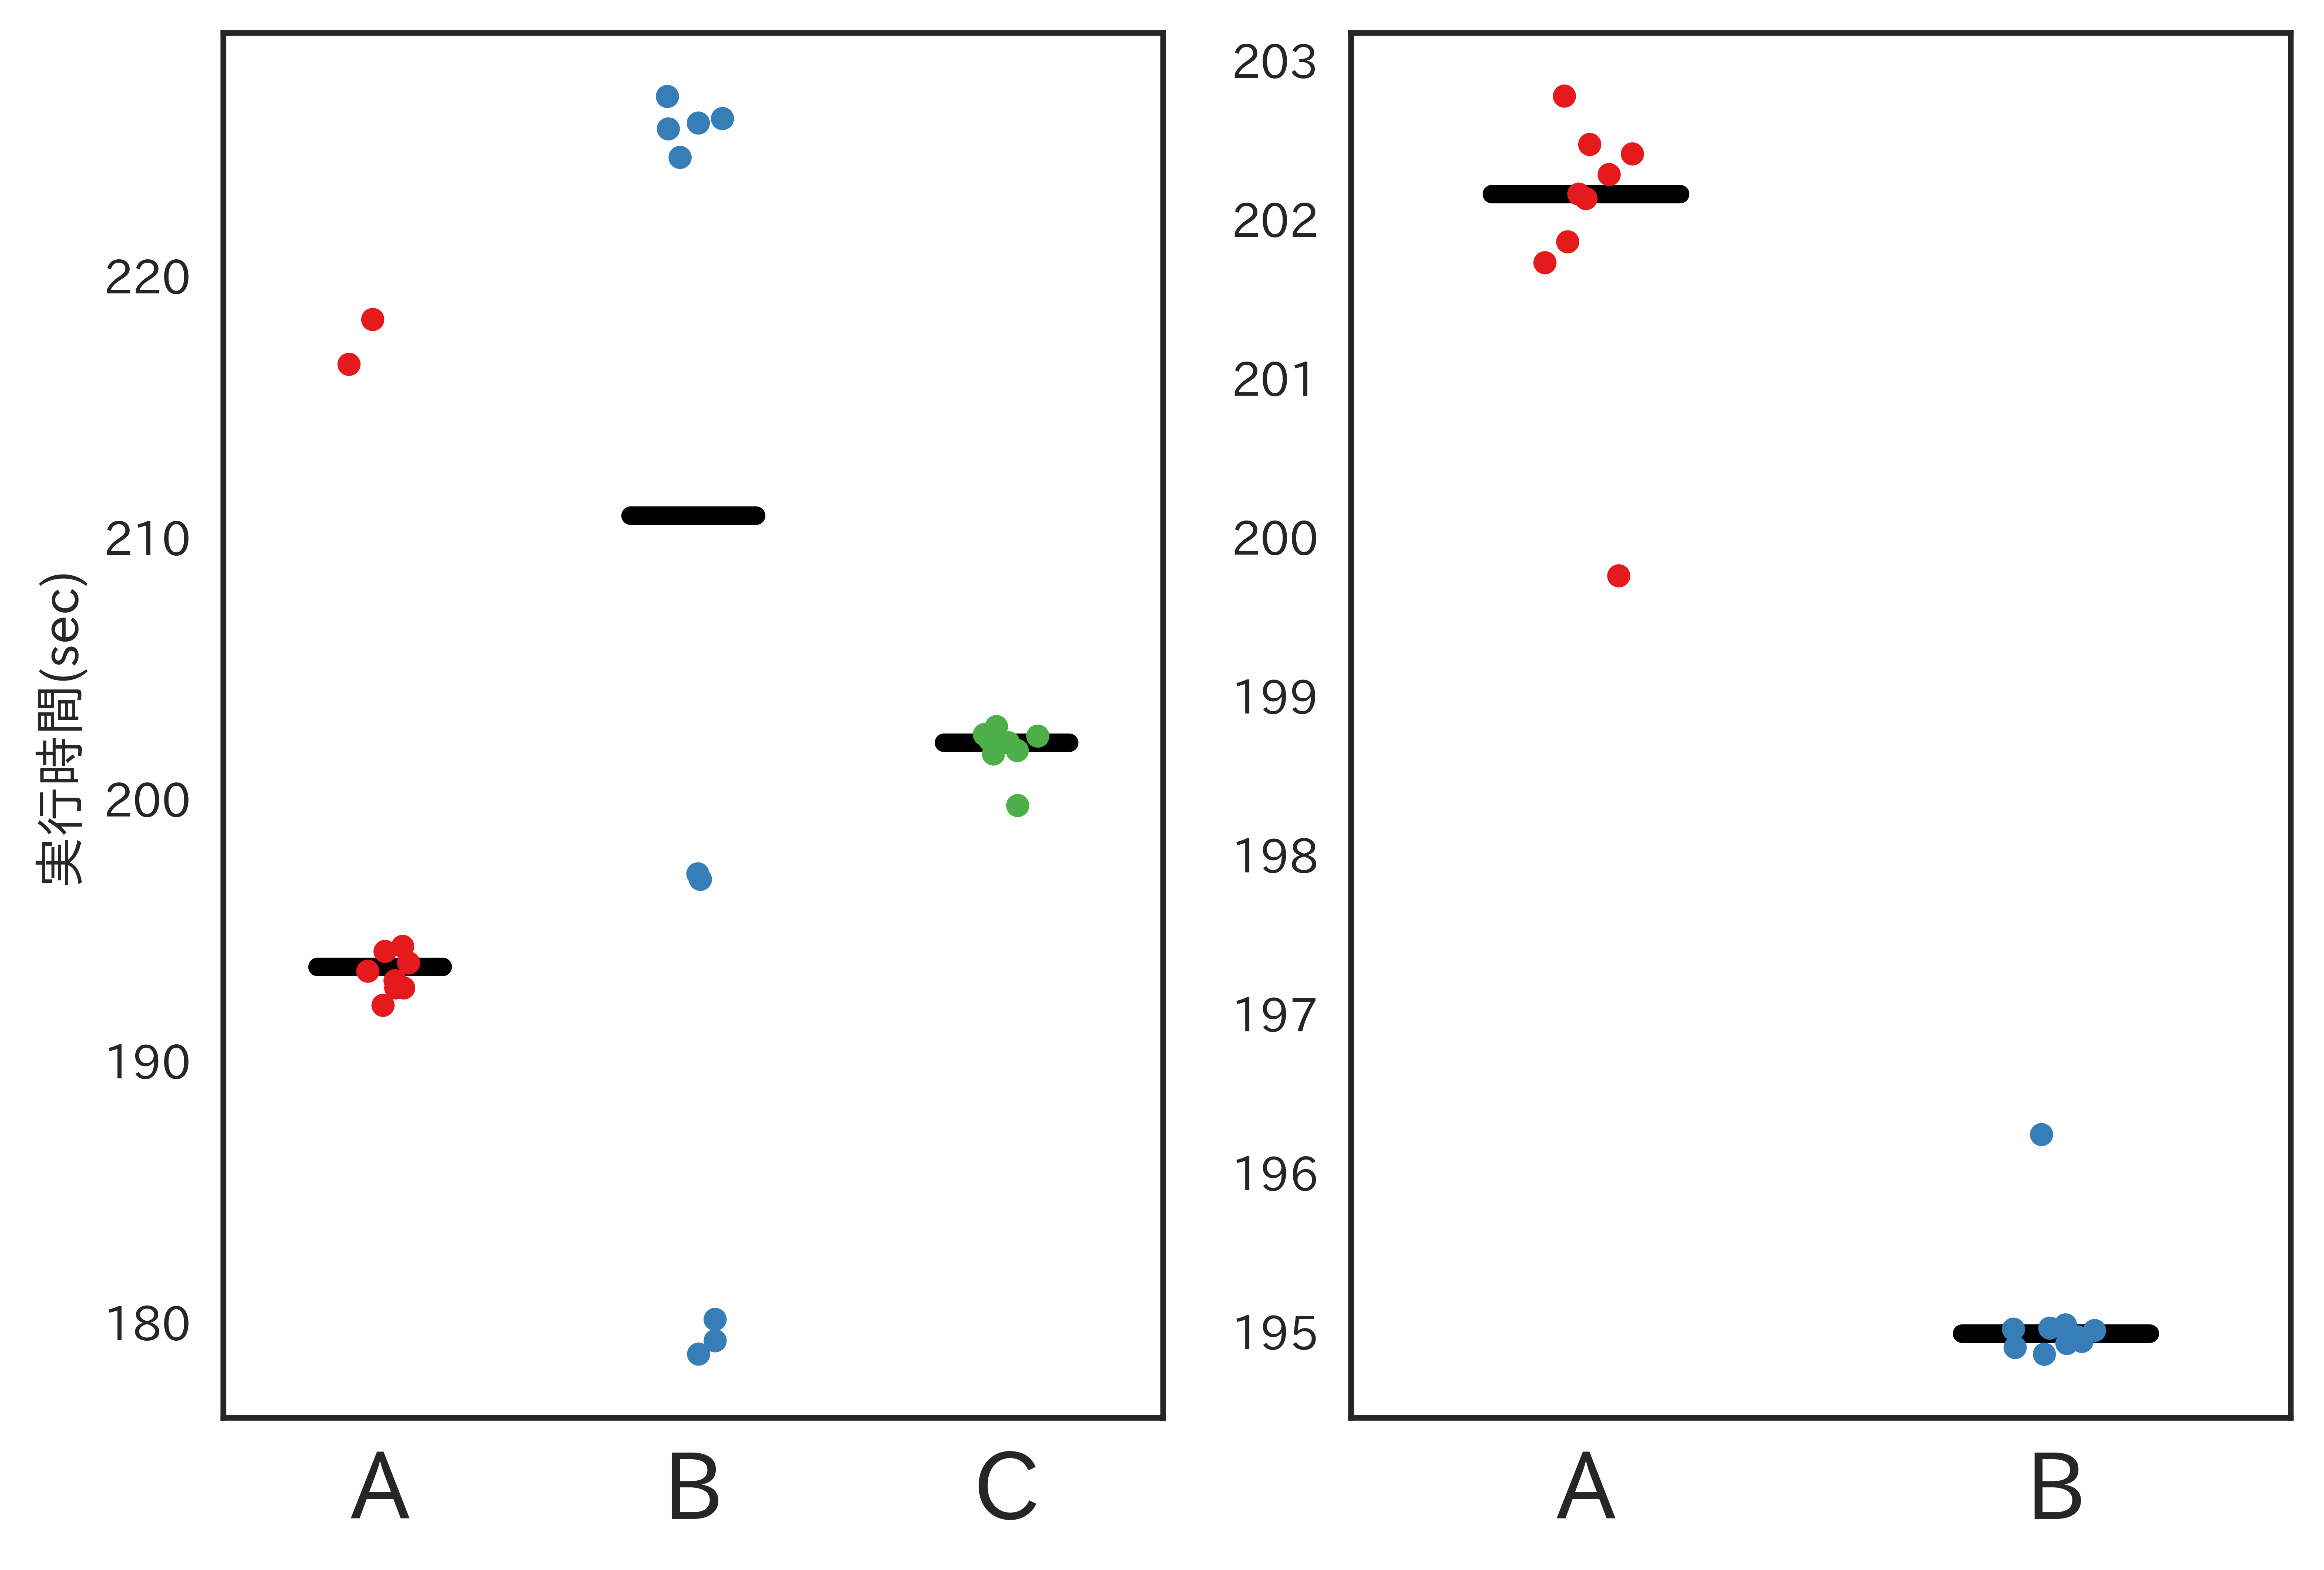

In [5]:
df_cluster = {
#     "最適化2": [195.48532, 206.052672, 192.95713600000002, 192.78956700000001, 194.115993, 192.78315700000002],
    "自動最適化": [218.33339799999999, 194.37527900000001, 193.06609699999998, 193.74333899999999, 192.785934, 192.78697299999999,216.61959999999999,194.18272099999999,192.122319,193.427179],
#     "計算機パラメータ": [306.157610, 306.413272, 247.838257, 306.945893, 306.132023, 246.600985, 247.733106, 305.482598, 306.259903, 251.214914],
    "手動最適化": [226.011645, 226.855698, 178.792345, 179.301381, 225.616986, 225.840626, 197.147325, 180.120307, 224.526922, 196.936687],
#     "icc": [266.276054, 267.938918, 265.444528, 265.809020, 271.246538, 271.793423, 271.584290, 272.576730, 271.736764, 272.912230],
        "配列くくり出ししない": [202.158979 ,202.775673, 199.756990, 201.858775, 202.281723, 202.130959, 202.471293, 202.411957, 201.727052]
}
table = {
#     "最適化2": "X",
    "自動最適化": "A",
#     "計算機パラメータ": "B",
    "手動最適化": "B",
    "配列くくり出ししない": "C",
    "icc": "D"
}

df_k = {
    "自動最適化": [202.158979 ,202.775673, 199.756990, 201.858775, 202.281723, 202.130959, 202.471293, 202.411957, 201.727052],
#     "計算機パラメータ": [540.314667, 540.195012, 540.236031, 540.566031, 540.155487, 540.235561, 539.998205, 540.286428, 540.843942, 540.834667],
    "手動最適化": [194.901470, 196.241227, 194.939445, 195.043659, 195.016793, 195.008183, 194.926891, 194.858799, 194.967911, 195.023119],
}
scatter_med2(df_cluster, df_k, table, table, "compare-abst-3.png")

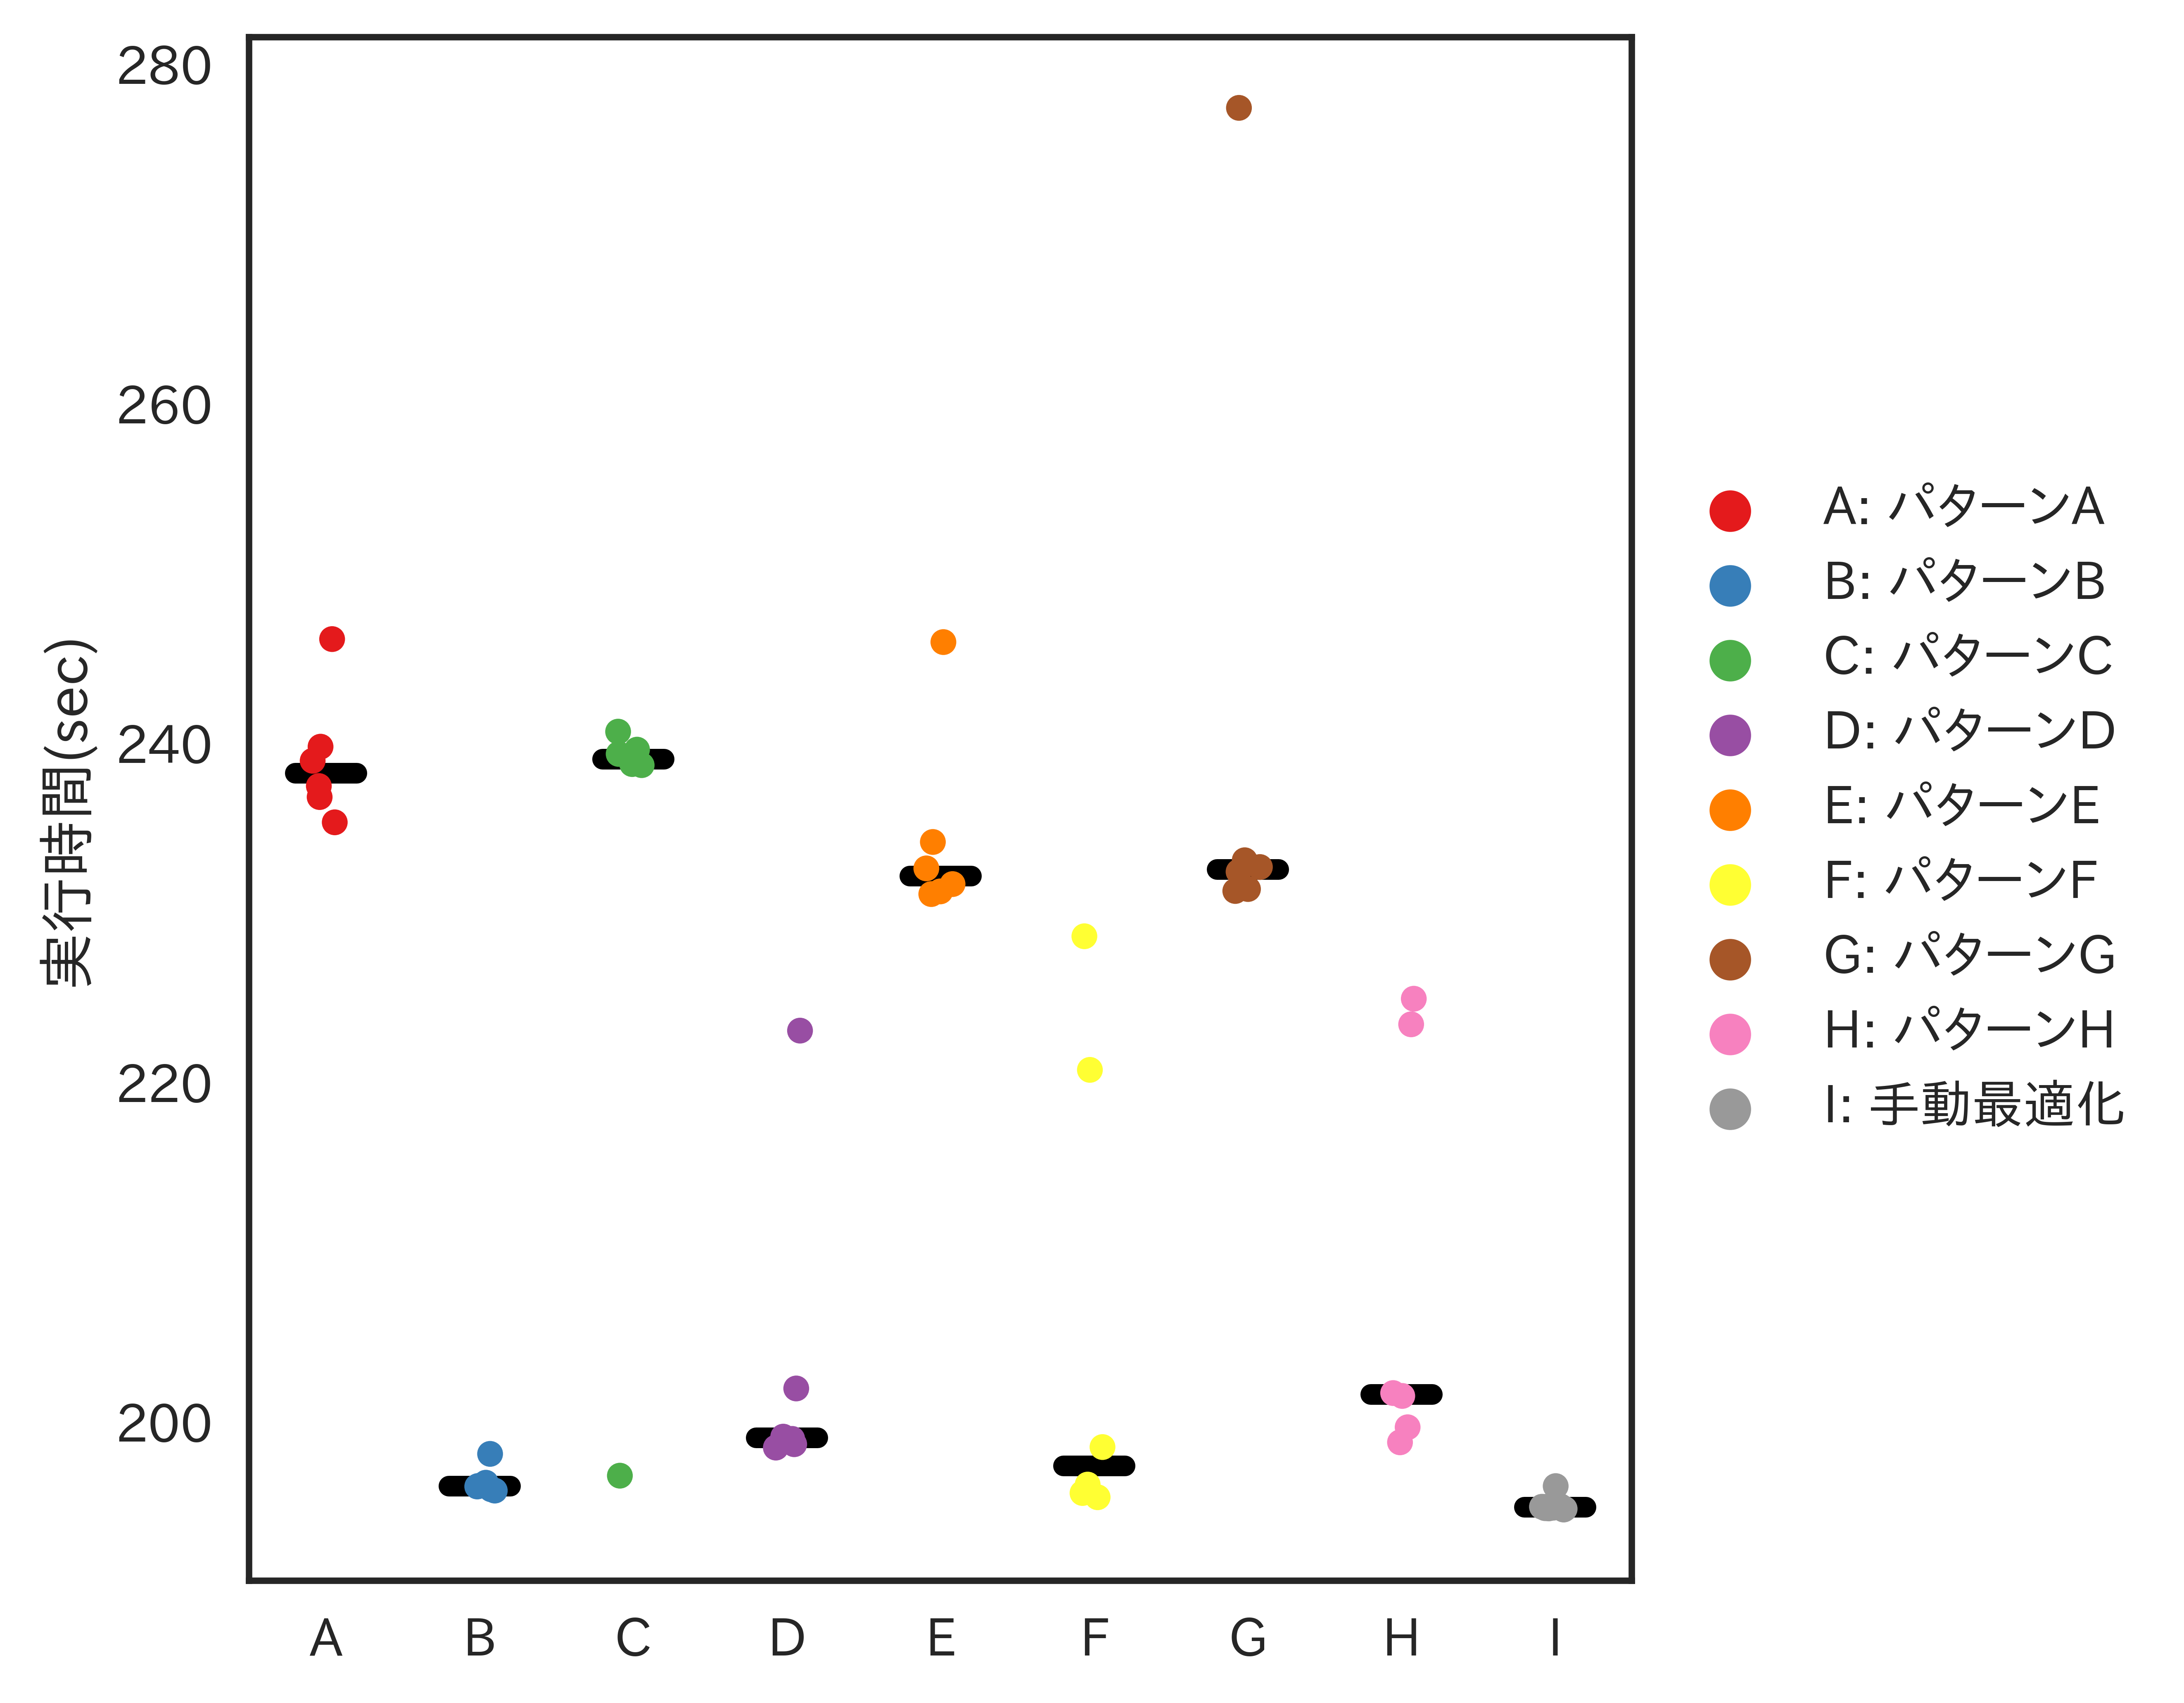

In [75]:
df = pd.read_csv("cluster/data/2018-02-04_21-14/result_candidate.csv")
# df['time_avg'] = (df['time'] + df['time0'] + df['time1'] + df['time2'] + df['time3'] + df['time4']) / 6.0
# df = df.sort_values(by=["time_avg"]).reset_index(drop=True)
# time = df['time_avg'].values
data = defaultdict()
label = defaultdict()
for i in range(len(df)):
    c = chr(ord('A') + i)
    data["パターン{0}".format(c)] = [df.loc[i]['time'], df.loc[i]['time0'], df.loc[i]['time1'], df.loc[i]['time2'], df.loc[i]['time3'], df.loc[i]['time4']]
    label["パターン{0}".format(c)] = c
data["手動最適化"] = [194.901470, 196.241227, 194.939445, 195.043659, 195.016793, 195.008183, 194.926891, 194.858799, 194.967911, 195.023119]
label["手動最適化"] = chr(ord('A') + i + 1)
scatter_med(data, label, "compare-merge-array.pdf")

In [67]:
d = {
    50: [11.299595, 11.384495, 11.384828, 11.196541, 11.132742, 11.287394, 11.424634, 11.242091, 11.14946, 11.119926],
    100: [22.149985, 21.891709, 21.988801, 21.914453, 21.884141, 22.318382, 21.924565, 22.01469, 21.788477, 21.735335],
    250: [57.835312, 57.568706, 57.780264, 57.423612, 57.19678, 57.969445, 57.537237, 57.50758, 57.556384, 49.106541],
    500: [115.949907, 118.858261, 116.484394, 117.071736, 120.179801, 116.437594, 116.655048, 116.247668, 115.89942, 116.949024],
    1000: [218.33339799999999, 194.37527900000001, 193.06609699999998, 193.74333899999999, 192.785934, 192.78697299999999,216.61959999999999,194.18272099999999,192.122319,193.427179]
}
label = []
data = []
for k in d:
    for v in d[k]:
        label.append(k)
        data.append(v)
df = pd.DataFrame({"シミュレーション時間（ms）": label, "実行時間(sec)": data})

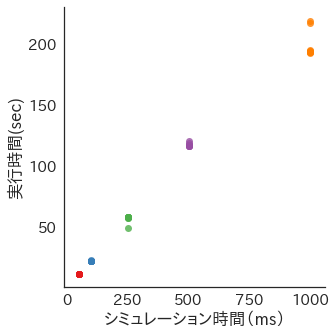

In [69]:
sns.set(font='IPAPGothic', style="white", font_scale=1.5)
p = sns.lmplot(x="シミュレーション時間（ms）", y="実行時間(sec)", hue="シミュレーション時間（ms）", palette="Set1", data=df, fit_reg=False, legend=False)
p.savefig(join("/Users/hashmup/Dropbox/研究室/卒業論文/thesis/images", "time-scale.png"))

In [70]:
import seaborn as sns
# sns.set_style(style="white")
sns.set(font='IPAPGothic', style="white")
def scatter_med2(data1, data2, filename):
    label1 = []
    label2 = []
    xtick1 = []
    xtick2 = []
    value1 = []
    value2 = []
    for k in data1:
        for v in data1[k]:
            value1.append(v)
            label1.append(k)
        xtick1.append(table1[k])
    for k in data2:
        for v in data2[k]:
            value2.append(v)
            label2.append(k)
        xtick2.append(table2[k])
    df1 = pd.DataFrame({
        "シミュレーション時間": label1,
        "実行時間(sec)": value1
    })
    df2 = pd.DataFrame({
        "シミュレーション時間": label2,
        "実行時間(sec)": value2
    })
    median_width = 0.4

    fig, axes = plt.subplots(nrows=1, ncols=2, dpi=900)
    sns.lmplot(x="シミュレーション時間", y="実行時間(sec)",  hue="シミュレーション時間", palette="Set1", data=df1, ax=axes[0], fit_reg=False)
    sns.lmplot(x="シミュレーション時間", y="実行時間(sec)",  hue="シミュレーション時間", palette="Set1", data=df2, ax=axes[1], fit_reg=False)
    for tick, text in zip(axes[0].get_xticks(), axes[0].get_xticklabels()):
        sample_name = text.get_text()  # "X" or "Y"

        # calculate the median value for all replicates of either X or Y
        median_val = df1[df1['category']==sample_name]['実行時間(sec)'].median()

        # plot horizontal lines across the column, centered on the tick
        axes[0].plot([tick-median_width/2, tick+median_width/2], [median_val, median_val],
                lw=4, color='k')
    for tick, text in zip(axes[1].get_xticks(), axes[1].get_xticklabels()):
        sample_name = text.get_text()  # "X" or "Y"

        # calculate the median value for all replicates of either X or Y
        median_val = df2[df2['category']==sample_name]['実行時間(sec)'].median()

        # plot horizontal lines across the column, centered on the tick
        axes[1].plot([tick-median_width/2, tick+median_width/2], [median_val, median_val],
                lw=4, color='k')
    axes[0].set_xlabel('')
    axes[1].set_xlabel('')
    axes[1].set_ylabel('')
#     axes[0].set_title('クラスタ')
#     axes[1].set_title('京')
    axes[0].set_xticklabels(xtick1, fontsize=20)
    axes[1].set_xticklabels(xtick2, fontsize=20)
    h1, l1 = axes[0].get_legend_handles_labels()
    h2, l2 = axes[1].get_legend_handles_labels()
    axes[0].legend_.remove()
    axes[1].legend_.remove()
#     fig.legend(h1+h2, l1, loc="center right", bbox_to_anchor=(1, 0.5), fontsize=10, frameon=True)
#     fig.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)
#     fig.subplots_adjust(right=0.85)
    fig.savefig(join("/Users/hashmup/Dropbox/研究室/卒業論文/thesis/images", filename))
    plt.show()

In [6]:
df_bench_b = pd.read_csv("data/2018-01-28_00-17/result_all.csv")
df_bench_a = pd.read_csv("data/2018-01-28_03-58/result_all.csv")
df_cluster = pd.concat([df_bench_b, df_bench_a]).sort_values(by="time").reset_index(drop=True)

In [7]:
data_ppn_cluster = defaultdict()
for i in range(1, 29):
    time = df_cluster[df_cluster["ppn"] == i]["time"].values
    time = [x for x in time if not np.isnan(x)]
    data_ppn_cluster[i] = time
    
data_omp_cluster = defaultdict()
for i in range(1, 17):
    time = df_cluster[df_cluster["omp_num_threads"] == i]["time"].values
    time = [x for x in time if not np.isnan(x)]
    data_omp_cluster[i] = time

In [8]:
df_bench_b = pd.read_csv("k/data/2018-01-29_10-26/result_all.csv")
df_bench_a = pd.read_csv("k/data/2018-01-29_17-12/result_all.csv")
df_bench_c = pd.read_csv("k/data/sub/result_all.csv")
df_bench_d = pd.read_csv("k/data/sub2/result_all.csv")
df_k = pd.concat([df_bench_b, df_bench_a, df_bench_c, df_bench_d]).sort_values(by="time").reset_index(drop=True)

In [9]:
data_ppn_k = defaultdict()
for i in range(1, 29):
    time = df_k[df_k["ppn"] == i]["time"].values
    time = [x for x in time if not np.isnan(x)]
    data_ppn_k[i] = time
    
data_omp_k = defaultdict()
for i in range(1, 17):
    time = df_k[df_k["omp_num_threads"] == i]["time"].values
    time = [x for x in time if not np.isnan(x)]
    data_omp_k[i] = time

In [10]:
import seaborn as sns
# sns.set_style(style="white")
sns.set(font='IPAPGothic', style="white")
def scatter4(data1, data2, data3, data4, filename):
    label1 = []
    label2 = []
    label3 = []
    label4 = []
    xtick1 = []
    xtick2 = []
    xtick3 = []
    xtick4 = []
    value1 = []
    value2 = []
    value3 = []
    value4 = []
    
    for k in data1:
        for v in data1[k]:
            value1.append(v)
            label1.append(k)
        xtick1.append(k)
    for k in data2:
        for v in data2[k]:
            value2.append(v)
            label2.append(k)
        xtick2.append(k)
    for k in data3:
        for v in data3[k]:
            value3.append(v)
            label3.append(k)
        xtick3.append(k)
    for k in data4:
        for v in data4[k]:
            value4.append(v)
            label4.append(k)
        xtick4.append(k)
    df1 = pd.DataFrame({
        "MPIプロセス数": label1,
        "実行時間(sec)": value1
    })
    df2 = pd.DataFrame({
        "MPIプロセス数": label2,
        "実行時間(sec)": value2
    })
    df3 = pd.DataFrame({
        "OpenMPスレッド数": label3,
        "実行時間(sec)": value3
    })
    df4 = pd.DataFrame({
        "OpenMPスレッド数": label4,
        "実行時間(sec)": value4
    })

    fig, axes = plt.subplots(nrows=1, ncols=2, dpi=900)
    sns.stripplot(x="MPIプロセス数", y="実行時間(sec)", edgecolor="none", hue="MPIプロセス数", palette="Set1", data=df1, jitter=True, ax=axes[0, 0])
    sns.stripplot(x="MPIプロセス数", y="実行時間(sec)", edgecolor="none", hue="MPIプロセス数", palette="Set1", data=df2, jitter=True, ax=axes[1, 0])
    sns.stripplot(x="OpenMPスレッド数", y="実行時間(sec)", edgecolor="none", hue="OpenMPスレッド数", palette="Set1", data=df3, jitter=True, ax=axes[0, 1])
    sns.stripplot(x="OpenMPスレッド数", y="実行時間(sec)", edgecolor="none", hue="OpenMPスレッド数", palette="Set1", data=df4, jitter=True, ax=axes[1, 1])

#     axes[0, 0].set_xticklabels(xtick1, fontsize=)
#     axes[1, 0].set_xticklabels(xtick2, fontsize=20)
#     axes[0, 1].set_xticklabels(xtick3, fontsize=20)
#     axes[1, 1].set_xticklabels(xtick4, fontsize=20)
#     h1, l1 = axes[0].get_legend_handles_labels()
#     h2, l2 = axes[1].get_legend_handles_labels()
    axes[0, 0].legend_.remove()
    axes[1, 0].legend_.remove()
    axes[0, 1].legend_.remove()
    axes[1, 1].legend_.remove()
    axes[0, 0].set_xlabel('')
    axes[0, 1].set_xlabel('')
    axes[1, 0].set_ylabel('')
    axes[0, 1].set_ylabel('')
    axes[1, 1].set_ylabel('')
#     fig.legend(h1+h2, l1, loc="center right", bbox_to_anchor=(1, 0.5), fontsize=10, frameon=True)
#     fig.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)
#     fig.subplots_adjust(right=0.85)
    fig.savefig(join("/Users/hashmup/Dropbox/研究室/卒業論文/thesis/images", filename))
    plt.show()

In [11]:
import seaborn as sns
# sns.set_style(style="white")
sns.set(font='IPAPGothic', style="white")
def scatter2(data1, data2, filename):
    label1 = []
    label2 = []
    xtick1 = []
    xtick2 = []
    value1 = []
    value2 = []
    
    for k in data1:
        for v in data1[k]:
            value1.append(v)
            label1.append(k)
        xtick1.append(k)
    for k in data2:
        for v in data2[k]:
            value2.append(v)
            label2.append(k)
        xtick2.append(k)
    df1 = pd.DataFrame({
        "MPIプロセス数": label1,
        "実行時間(sec)": value1
    })
    df2 = pd.DataFrame({
        "OpenMPスレッド数": label2,
        "実行時間(sec)": value2
    })

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), dpi=900)
    sns.stripplot(x="MPIプロセス数", y="実行時間(sec)", edgecolor="none", hue="MPIプロセス数", palette="Set1", data=df1, jitter=True, ax=axes[0])
    sns.stripplot(x="OpenMPスレッド数", y="実行時間(sec)", edgecolor="none", hue="OpenMPスレッド数", palette="Set1", data=df2, jitter=True, ax=axes[1])

#     axes[0, 0].set_xticklabels(xtick1, fontsize=)
#     axes[1, 0].set_xticklabels(xtick2, fontsize=20)
#     axes[0, 1].set_xticklabels(xtick3, fontsize=20)
#     axes[1, 1].set_xticklabels(xtick4, fontsize=20)
#     h1, l1 = axes[0].get_legend_handles_labels()
#     h2, l2 = axes[1].get_legend_handles_labels()
    axes[0].legend_.remove()
    axes[1].legend_.remove()
    axes[0].set_xlabel('')
    axes[1].set_xlabel('')
    axes[0].set_ylabel('')
    axes[1].set_ylabel('')
#     axes[0].set_xticklabels(xtick1, fontsize=8, rotation=45)
#     axes[1].set_xticklabels(xtick2, fontsize=8, rotation=45)
#     fig.legend(h1+h2, l1, loc="center right", bbox_to_anchor=(1, 0.5), fontsize=10, frameon=True)
#     fig.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)
#     fig.subplots_adjust(right=0.85)
    fig.savefig(join("/Users/hashmup/Dropbox/研究室/卒業論文/thesis/images", filename))
    plt.show()

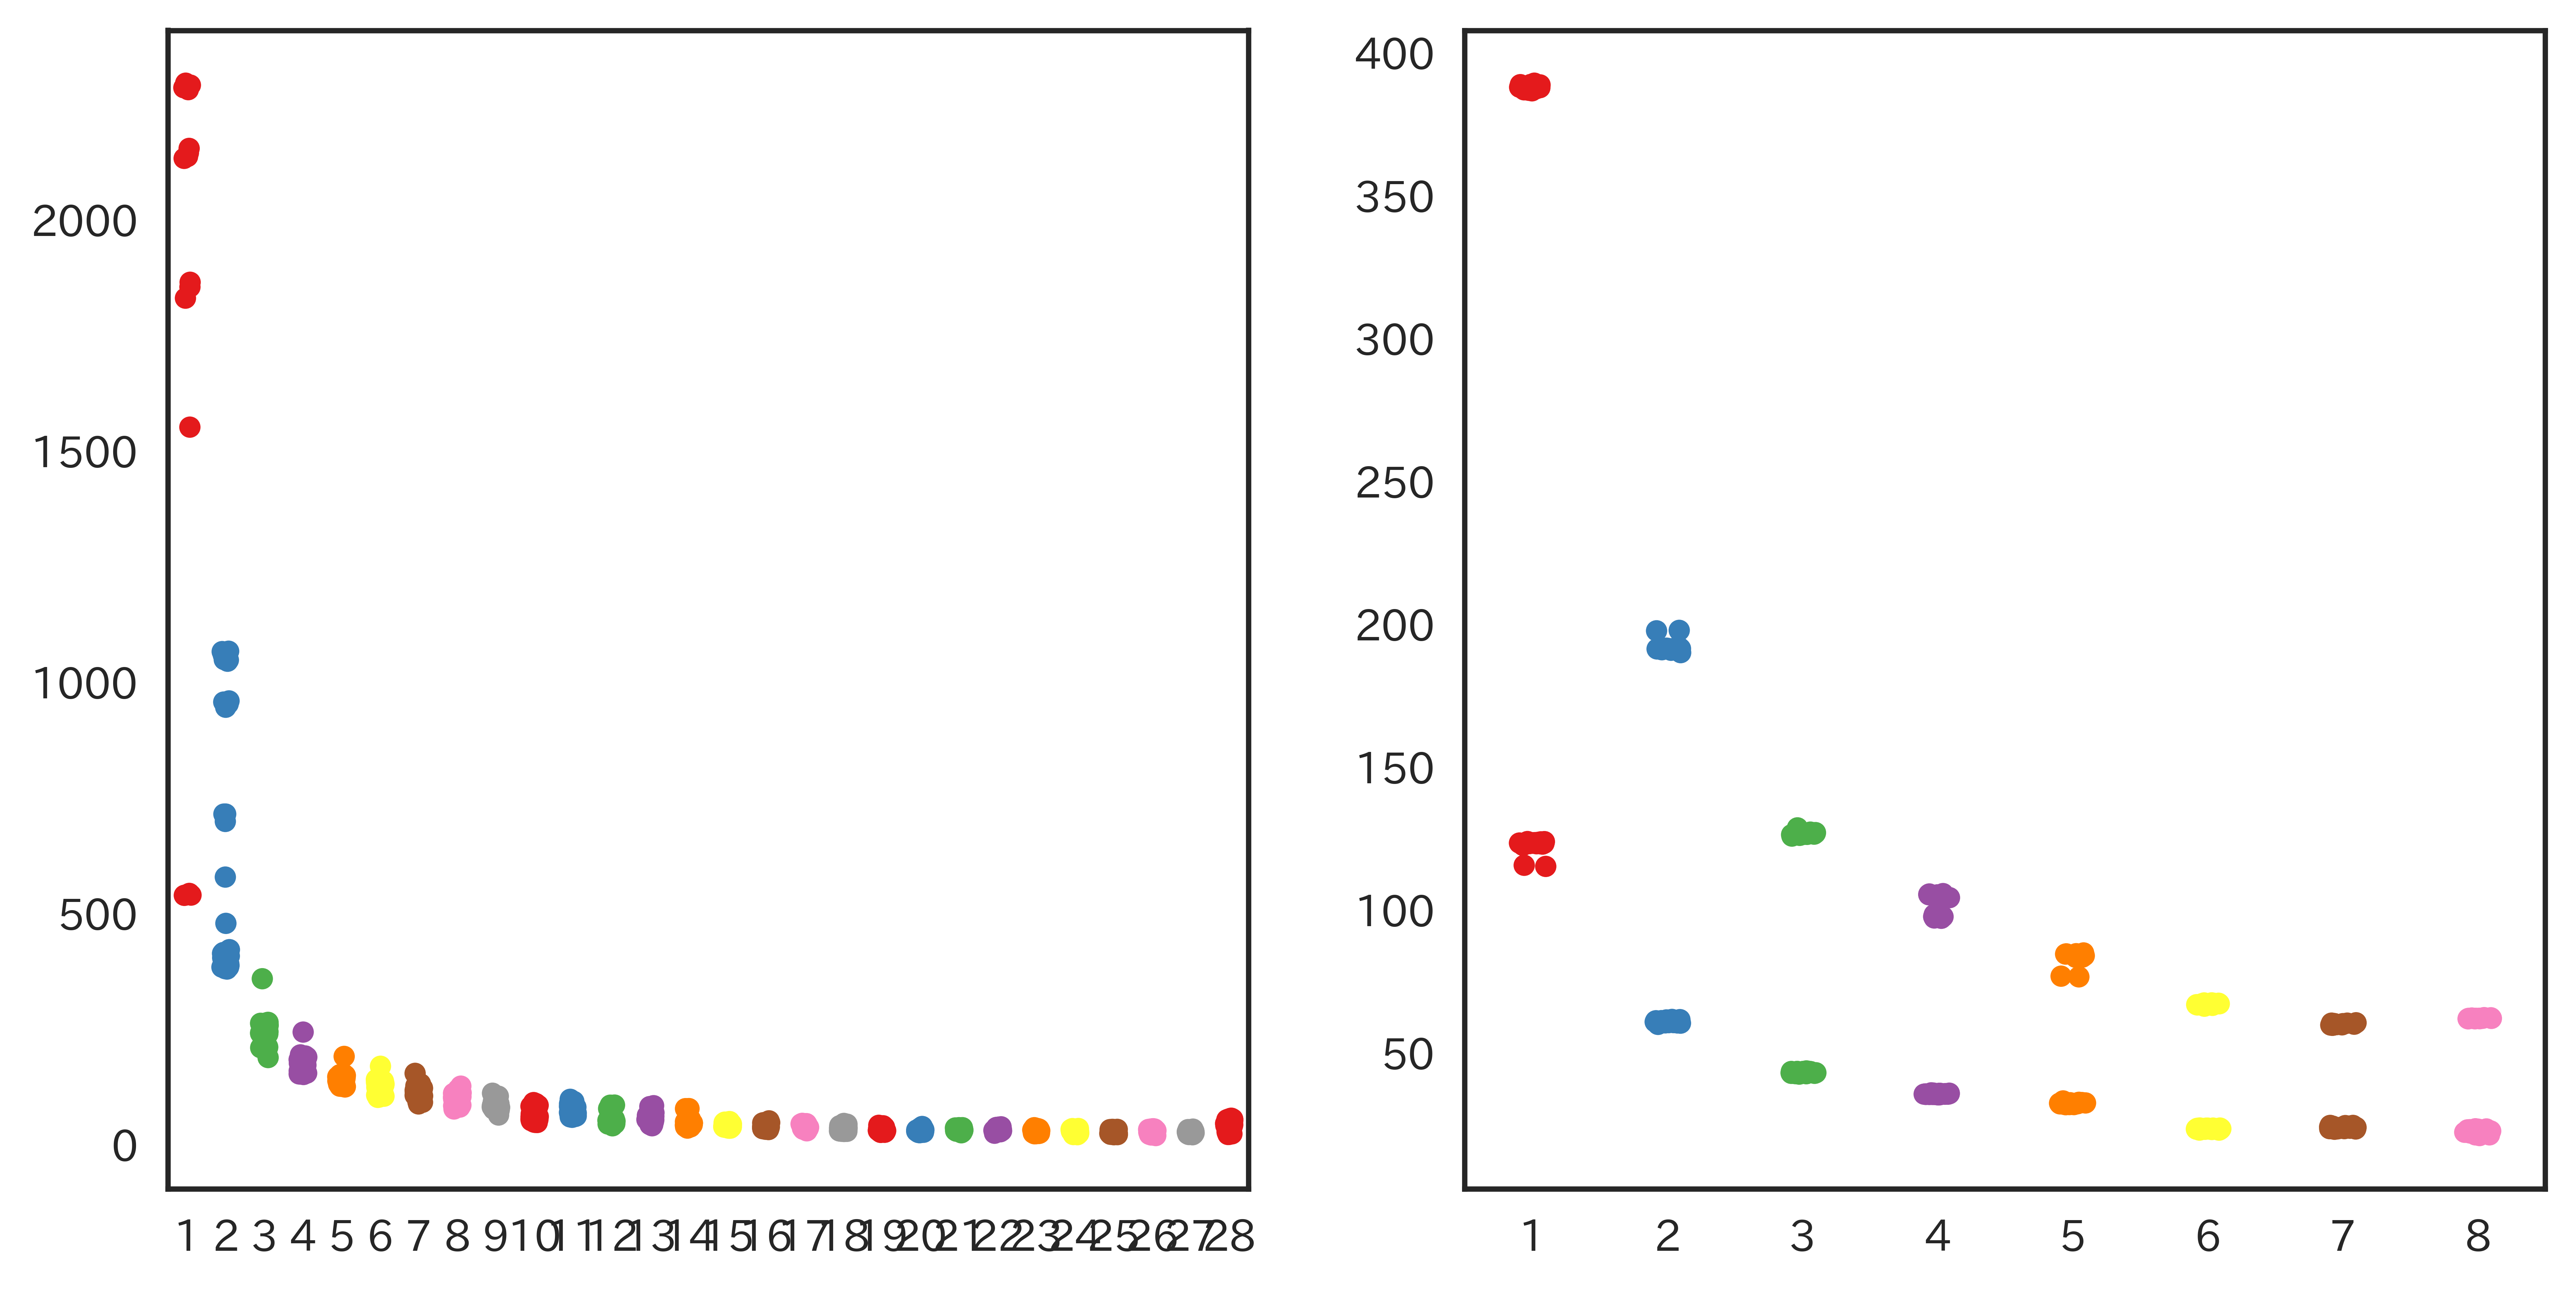

In [12]:
scatter2(data_ppn_cluster, data_ppn_k, "test.png")

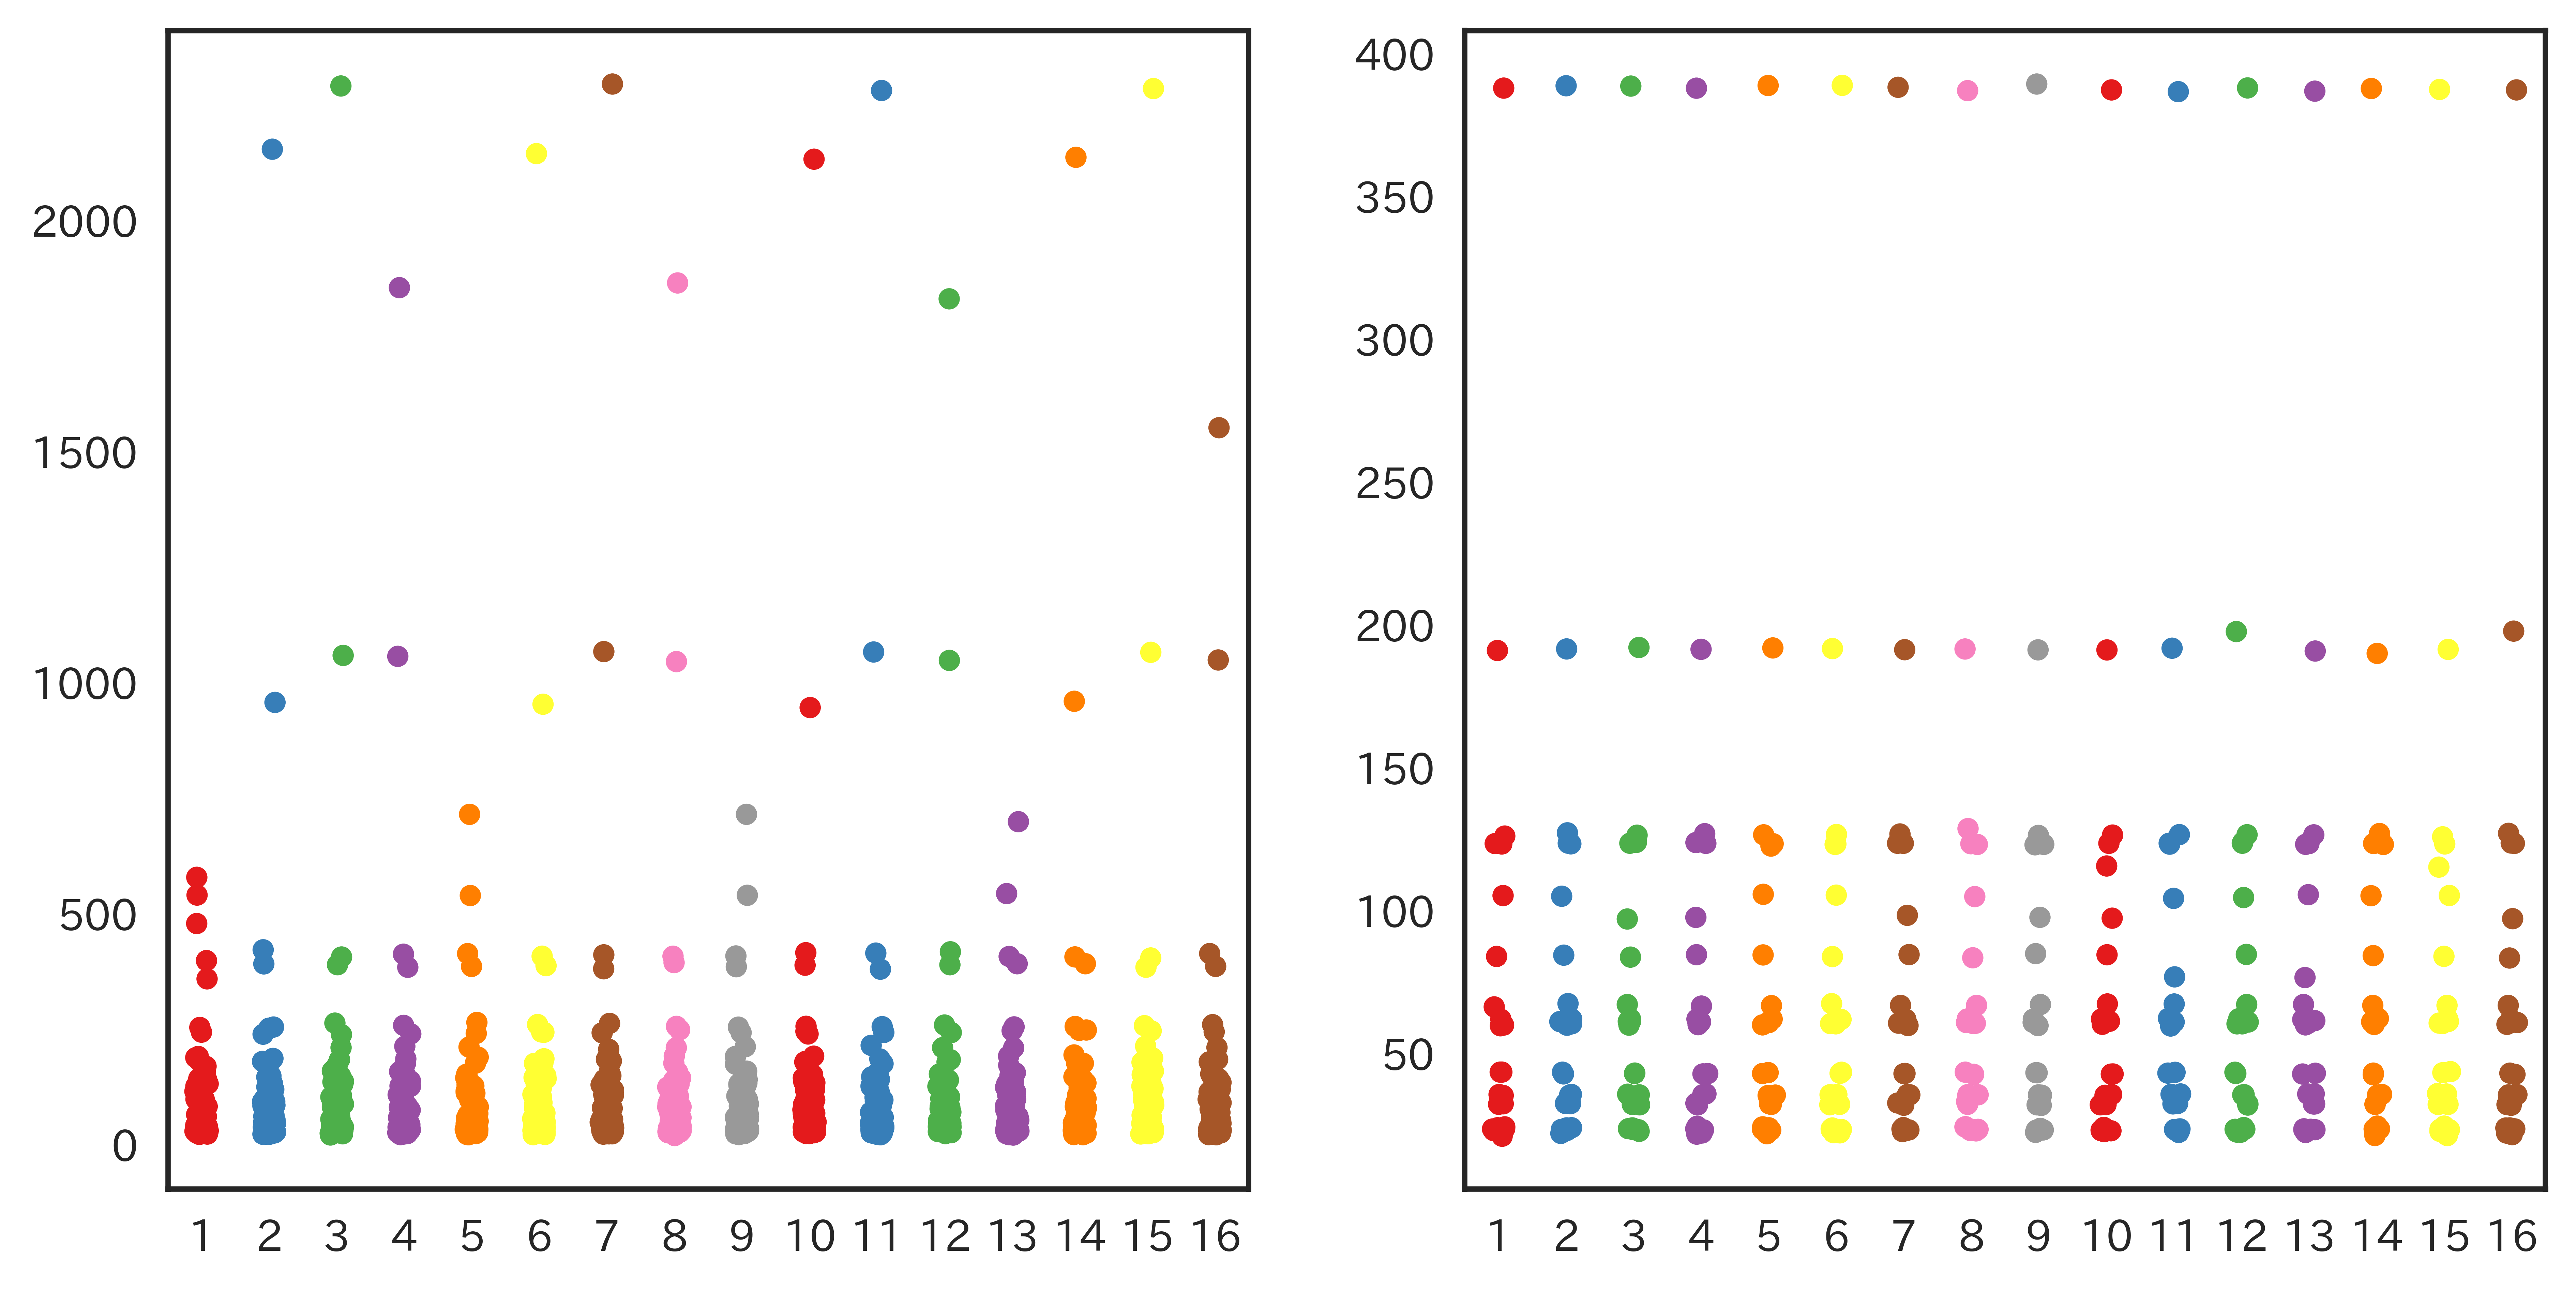

In [13]:
scatter2(data_omp_cluster, data_omp_k, "test2.png")